# Mini-Project: A Simple Search Engine from Scratch
In this mini-project you will study the fundaments of IR.

The mini-project is divided as follow:

- **Week 1**: Study the provided notebook. Using the VSM retrieval model, run experiments *(section 4)* with the provided collection. Compute the metrics MAP, P10 and precision-recall curves.

- **Week 2**: Implement the LMD and LMJM retrieval models and repeat the experiments with the new models. Compare it to the previous retrieval models.

- **Week 3**: Implement the RM3 retrieval model and repeat the experiments with the new models. Compare it to the previous retrieval models.

- **Week 4**: Implement the BM25 retrieval model and repeat the experiments with the new models. Compare it to the previous retrieval models.

**Submission date: 15 October**

## 1. Vector Space Model

In the vector space model, documents are represented as a vector $d_j=(w_{d_j,1},w_{d_j,2}, ..., w_{d_j,n})$ of $n$ word frequencies -- most of the words are equal to 0. Queries are also represented as a vector of words $q_j=(w_{q_j,1},w_{q_j,2}, ..., w_{q_j,n})$. In the vector space model, each document word is weighted by their *tf-idf*

$${tf-idf} = tf*\frac{|D|}{log (df(w_a))}$$

The vector space model is based on the cosine similarity, which measures the angle between the two vectors in the 1-unit sphere:

$$cos(q,d) = \frac{\sum_t q_t\cdot d_t}{\sqrt{\sum_t q^2_t}\cdot \sqrt{\sum_t d^2_t }}$$


Below you can read the corresponding matricial implementation for multiple documents.

### Parser
Using the CountVectorizer class of Scikit-Learn, try the different parser options by generating unigrams and bigrams with different stop words.


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#Default values for arguments for CountVectorizer on vectorizer
vectorizer = CountVectorizer()
#Defined some arguments of CountVectorizer on bigram_vectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', 
                                    min_df=1, stop_words = {'the', 'is'})
#simple list of strings, represents a document
corpus = ['This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?', ]

In [2]:
#Creates a vector with the words of the string ,only includes the words with 2 or more characters
uni_analyze = vectorizer.build_analyzer()
uni_analyze("This is a text document to analyze.")

['this', 'is', 'text', 'document', 'to', 'analyze']

In [3]:
#Counts each word ocurrence in the list corpus,returns a sparse matrix with the count of the words
tf_uni = vectorizer.fit_transform(corpus).toarray()
#Prints the corresponding words to the columns of the sparse matrix
print(vectorizer.get_feature_names())
#Added line to see the matrix, each row represents a line in the document, each column represents the count of each word found in the document
print(tf_uni)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


In [4]:
''''Separates the words, ignores stop word "the" and "is",it also reads the document one time separating each of the words,
then a second time separating in 2 words due to the n-gram_range(1,2)''' 


bi_analyze = bigram_vectorizer.build_analyzer()
bi_analyze("This is a text document to analyze.") 

['this',
 'a',
 'text',
 'document',
 'to',
 'analyze',
 'this a',
 'a text',
 'text document',
 'document to',
 'to analyze']

In [5]:
#Creates another sparce matrix using the bigram_vectorizer method, this one is bigger than the first method because the additional
#2-gram sparsing, it searches the document in 1-grams first then the bigrams
tf_bi = bigram_vectorizer.fit_transform(corpus).toarray()
print(bigram_vectorizer.get_feature_names())
print()
print(tf_bi)

['and', 'and third', 'document', 'first', 'first document', 'one', 'second', 'second document', 'second second', 'third', 'third one', 'this', 'this first', 'this second']

[[0 0 1 1 1 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 2 1 1 0 0 1 0 1]
 [1 1 0 0 0 1 0 0 0 1 1 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 1 1 0]]


In [6]:
bigram_vectorizer.vocabulary_.get('document')

2

### TF IDF and the cosine similarity

In [7]:
#calculates the sum of each column of the sparse matrix
termCollFreq = np.sum(tf_uni != 0, axis = 0)
#calculates the sum of each row
docLen = np.sum(tf_uni, axis = 1)

#calculates idf by dividing the number of columns by the sum of each column and doing the log of the result.
idf = np.log(np.size(corpus)/termCollFreq)

idf_rows = np.dot(np.ones((np.size(corpus),1)), idf.reshape(1,np.size(idf)))
tfidf = tf_uni*idf_rows

#Calculates the Norm of each row of the matrix, in other words, each document.
docNorms = np.sqrt(np.sum(np.power(tfidf,2), axis = 1))
        
print("\ntf:\n", tf_uni)
print("\nidf:\n", idf)
print("\ntfidf:\n", tfidf)
print("\ndocnorms:\n", docNorms)


tf:
 [[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]

idf:
 [1.38629436 0.28768207 0.69314718 0.28768207 1.38629436 1.38629436
 0.         1.38629436 0.28768207]

tfidf:
 [[0.         0.28768207 0.69314718 0.28768207 0.         0.
  0.         0.         0.28768207]
 [0.         0.28768207 0.         0.28768207 0.         2.77258872
  0.         0.         0.28768207]
 [1.38629436 0.         0.         0.         1.38629436 0.
  0.         1.38629436 0.        ]
 [0.         0.28768207 0.69314718 0.28768207 0.         0.
  0.         0.         0.28768207]]

docnorms:
 [0.85366032 2.81700748 2.40113227 0.85366032]


In [8]:
np.array([1,2])**np.array([3,4])

array([ 1, 16])

In [9]:
query = 'document'
#checks each column of the features and only keeps the ones that are equal to the query
query_vector = vectorizer.transform([query]).toarray()
#Norm of the created vector
queryNorm = np.sqrt(np.sum(np.power(query_vector, 2), axis = 1))

#Scores the query_vector for each document.
#The second document has the same frequencie of the word document as the first and forth, but due to a bigger docNorm because,
#this document has more words and the score is lower.
doc_scores = np.dot(query_vector, tfidf.T)/(docNorms*queryNorm)

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Inverted Index
The matricial implementation is not scalable because it computes the similarity for all documents in the collection. However, one should only compute the similarity for the documents containing the query words. This is where the inverted index comes to our rescue.

Read the inverted index implementation presented next. Describe in your own words how the cosine similarity should be implemented with the inverted index:


In [10]:
features = vectorizer.get_feature_names()

#Creates a dictionary whit the posting lists and the feature names
i = 0
inverted_index = dict()
for token in features:
    print("==== Creating the posting list for token \"", token, "\"")
    docs_with_token = np.where(tf_uni[:,i] != 0)
    len = np.size(docs_with_token,1)
    
    postings_matrix = np.concatenate([tf_uni[docs_with_token,i], docs_with_token])
    postings_list = list(map(tuple, postings_matrix.T))
    inverted_index[token] = postings_list
    # each line shows the frequencie of the word and the the correspondent document where the word was found
    # this is used to map the information on the database.
    print(postings_list)
    i = i + 1

==== Creating the posting list for token " and "
[(1, 2)]
==== Creating the posting list for token " document "
[(1, 0), (1, 1), (1, 3)]
==== Creating the posting list for token " first "
[(1, 0), (1, 3)]
==== Creating the posting list for token " is "
[(1, 0), (1, 1), (1, 3)]
==== Creating the posting list for token " one "
[(1, 2)]
==== Creating the posting list for token " second "
[(2, 1)]
==== Creating the posting list for token " the "
[(1, 0), (1, 1), (1, 2), (1, 3)]
==== Creating the posting list for token " third "
[(1, 2)]
==== Creating the posting list for token " this "
[(1, 0), (1, 1), (1, 3)]


### Evaluation
Using the Vector Space Model, run the experiments of section 4.

We advice you to use an external Python IDE for editing more complex implementations. **The Notebook should be used as a notebook, not as an IDE**. Your implementations should be organized on external classes as below:

In [11]:
import RetrievalModelsMatrix as b

aa = b.RetrievalModelsMatrix(tf_uni, vectorizer)
#unfinished in retrieval methods 
#aa.score_lmd("document",1)

### Precision-Recall Curve

In [13]:
import MeanAveragePrecision as m
bb=m.MeanAveragePrecision(tf_uni,vectorizer)

print(bb.cumulative_pscore('second'))  #Will be used to determine the precision recall curve
bb.recall('second')   

[0.         1.         0.66666667 0.5       ]


array([0., 1., 1., 1.])

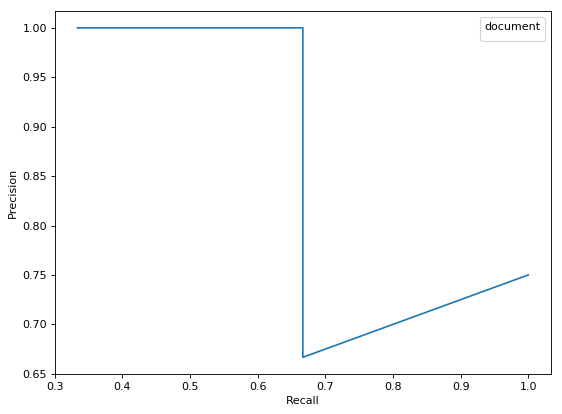

In [14]:
bb.pr_curve('document')

## 2. Retrieval Models

In this section you will implement three of the most popular retrieval model. After finishing each retrieval model implementation, run the experiments of section 4 with the new model.

### Language Model with Jelineck-Mercer Smoothing (20%)
The family of Language Models for retrieval build on the density distribution of the terms over each document and the density distribution of terms over the collection of documents.

There several ways of avoiding the zero probabilities problem with term smoothing.  The Jelineck-Mercer smoothing model uses a mixture of probabilities between the document model $M_d$ and the corpus model $M_c$:

$$p(q|d,C)= \lambda \cdot p(q|M_d) + (1-\lambda)\cdot p(q|M_c)$$

Implement the LMJM retrieval model using the matricial definitions:

In [ ]:
query = "document"

# TO DO: LMJM model

print(doc_scores)

Implement the LMJM retrieval model using the inverted-index data structures:

In [ ]:
query = "document"

# TO DO: LMJM model

print(doc_scores)

### Language Model with Dirichlet Smoothing (20%)
Another way of avoiding the zero probabilities problem is with the Dirichlet smoothing model that uses a mixture of frequencies between the term document frequencies $f_{t,c}$ and the term corpus frequency $\mu \cdot M_c(t)$:

$$p(t|M_d, M_c)= \frac{f_{t,d}+\mu \cdot M_c(t)}{|d| + \mu}$$

Implement the LMD retrieval model using the matricial definitions:


In [ ]:
query = "document"

# TO DO: LMD model

print(doc_scores)

Implement the LMD retrieval model using the inverted-index data structures:

In [ ]:
query = "document"

# TO DO: LMD model

print(doc_scores)

### BM 25 (20%)

The BM25 is model is an evolution of the tf-idf weighting based on a two Poisson distribution per term. It is obviously impossible to estimate each term distribution -- the approximation to the two Poisson distribution is given by the expression:

$$RSV = \sum q_t \cdot \frac{f_{t,d}(k_1 + 1)}{k_1 ((1-b) + b(\frac{l_d}{l_avg})) + f_{t,d} }\cdot IDF_t$$

Implement the BM5 retrieval model using the matricial definitions:

In [ ]:
query = "document"

# TO DO: BM25 model

print(doc_scores)

Implement the BM25 retrieval model using the inverted-index data structures:

In [ ]:
query = "document"

# TO DO: BM25 model

print(doc_scores)

### Evaluation
Using the implemented Retrieval Models, run the experiments of section 4.


## 3. Pseudo-Relevance Feedback (RM3) (20%)

Using the RM3 Model, run the experiments of section 4.

Implement the RM3 retrieval model using the matricial definitions:

In [ ]:
query = "document"

# TO DO: RM3 model

print(doc_scores)

Implement the RM3 retrieval model using the inverted-index data structures:

In [ ]:
query = "document"

# TO DO: RM3 model

print(doc_scores)

### Evaluation
Using the implemented RM3 model, run the experiments of section 4.


## 4. Experiments and Results (20%)
The goal of this section is to compare experimentally the different retrieval models. In this section you must:
- Load the Cranfield documents.
- Run the implemented retrieval models
- Plot the precision-recall curves.
- Compute MAP.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import simpleparser as parser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import collectionloaders
import RetrievalModelsMatrix as model

verbose = False
bigrams = True

### 1. Load the corpus
cranfield = collectionloaders.CranfieldTestBed()

### 2. Parse the corpus
# Tokenize, stem and remove stop words
def vsm_test(bigrams):
    
    
    if not bigrams:
        vectorizer = CountVectorizer()
    else:
        vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', 
                                        min_df=1, stop_words = {'the', 'is'})
    
    corpus = parser.stemCorpus(cranfield.corpus_cranfield['abstract'])
    
    ### 3. Create the model
    # Compute the term frequencies matrix and the model statistics
    tf_cranfield = vectorizer.fit_transform(corpus).toarray()
    models = model.RetrievalModelsMatrix(tf_cranfield, vectorizer)
    
    ### 4. Run the queries over the corpus
    i = 1
    map_vsm = 0
    precision_vsm = []

    for query in cranfield.queries:
        # Parse the query and compute the document scores
        scores = models.score_vsm(parser.stemSentence(query))
    
        # Do the evaluation
        [average_precision, precision, recall, thresholds] = cranfield.eval(scores, i)
        map_vsm = map_vsm + average_precision
        precision_vsm.append(precision)
        
        # Some messages...
        if verbose:
            plt.plot(recall, precision, color='silver', alpha=0.1)
            print('qid =',i, 'VSM     AP=',average_precision)
        
        i = i + 1

    del models #deletes class instance
    map_vsm = map_vsm/cranfield.num_queries
    return map_vsm,recall,precision_vsm

### Tests the vsm retrieval model 
    
First test without bigrams and second with bigrams

Stores the values of the tests in a 3 lists

In [ ]:

mapl=[]
recl=[]
precl=[]
for b in [False,True]:
    new_map,new_recall,new_precision=vsm_test(b)
    mapl.append(new_map)
    recl.append(new_recall)
    precl.append(new_precision)
    
ind=np.argmax(mapl)  #finds the index of the biggest map value
map_vsm=mapl[ind]
recall=recl[ind]
precision_vsm=precl[ind]


### Compares the Precision-Recall curves of the tests

In [ ]:
plt.plot(recl[0], np.mean(precl[0],axis=0), color='b', alpha=1,label=' normal ngrams')
plt.plot(recl[1], np.mean(precl[1],axis=0), color='r', alpha=1,label=" bigrams")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.show

In [ ]:
recall

In [ ]:
cranfield.queries

In [ ]:
### Show results
print('MAP=',map_vsm)

plt.plot(recall, np.mean(precision_vsm,axis=0), color='b', alpha=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.fill_between(recall, 
                 np.mean(precision_vsm,axis=0)-np.std(precision_vsm,axis=0), 
                 np.mean(precision_vsm,axis=0)+np.std(precision_vsm,axis=0), facecolor='b', alpha=0.1)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall (MAP={0:0.2f})'.format(map_vsm))
plt.savefig('results/prec-recall.png', dpi=100)


### Results and discussion


The following table summarizes the MAP and P10 results:

| Retrieval Model | P10 | MAP   |
|-----------------|-----|-------|
| VSM             | ?   | {{map_vsm}} |
| LMD             | ?   | ? |
| LMJM             | ?   | ? |
| BM25             | ?   | ? |

![](results/prec-recall.png)